# 기계학습개론 - 파이썬 머신러닝 발표

## 전전컴 2014440130 정현진

### 파이썬 문법 맛보기

In [52]:
a = 2
print (a)

2


In [53]:
print (a*a)
print (a**4)

4
16


In [15]:
w_ = [ 1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
print (w_)

[1, 2, 3, 4, 5, 6, 7, 8]


In [18]:
print (w_[0:1]) # 범위 지정

[1]


In [41]:
print (w_[2:4]) # 2번째부터 4번째까지 (시작은 0번째)

[3, 4]


In [20]:
print (w_[0:]) # 뒤를 생략하면 "끝까지" (0부터))

[1, 2, 3, 4, 5, 6, 7, 8]


In [21]:
print (w_[:4]) # 앞을 생략하면 "처음부터" (4까지)

[1, 2, 3, 4]


In [23]:
print (w_[:]) # 둘 다 생략하면 

[1, 2, 3, 4, 5, 6, 7, 8]


In [43]:
for i in range(5):
    print (i)

0
1
2
3
4


In [44]:
for x in ["a", "b", "c"]:
    print (x)

a
b
c


In [46]:
for x, y in zip( [1, 2, 3], [4, 5, 6] ):
    print (x, y)

1 4
2 5
3 6


In [38]:
import numpy as np

In [39]:
x = [1, 1, 1]
y = [1, 2, 3]

np.dot(x, y)

6

In [40]:
x = [[1, 1, 1],
     [2, 2, 2]]
y = [1, 2, 3]

np.dot(x, y)

array([ 6, 12])

In [55]:
for x in [1, 2, 3, 4, 5, 6, 7, 8]:
    print (np.where(x>5, 1, -1))

-1
-1
-1
-1
-1
1
1
1


In [47]:
class Person(object):
    
    def __init__(self, name, gender, job):
        self.name = name
        self.gender = gender
        self.job = job
        print("Hi. I'm", self.name)
    
    def laugh(self):
        print("hahahaha~~")

IU = Person("IU", "female", "Singer")
IU.laugh()

Hi. I'm IU
hahahaha~~


### 맛보기 끝!

## 퍼셉트론 학습 알고리즘 구현

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta: Learning rate (between 0.0 and 1.0)
    n_iter: Passes over the training dataset.

    Attributes
    -----------
    w_: Weights after fitting.
    errors_ : Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ 훈련데이터 X에 대해 학습. y는 X의 각 아이템의 실제 클래스 (정답) """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        """ n_iter 만큼 반복한다 """
        for _ in range(self.n_iter):
            errors = 0
            
            """ 훈련데이터의 아이템 각각에 대해 반복 """
            for xi, target in zip(X, y):
                """ xi: 학습 데이터의 i번째 아이템
                    target: xi의 실제 클래스 (정답) """
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """ X와 weight의 dot product """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ X의 클래스 예측 """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    

...

### Reading-in the Iris data

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<br>
<br>

### Plotting the Iris data

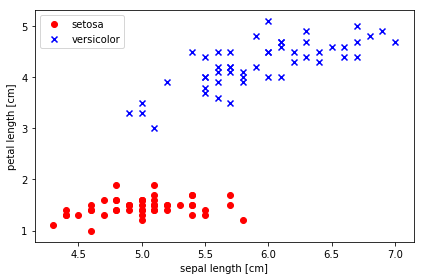

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Training the perceptron model

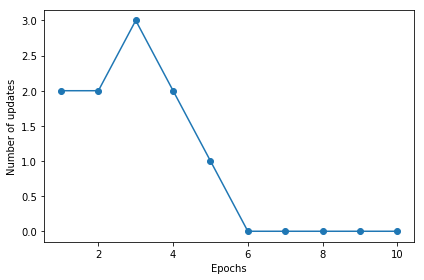

In [4]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

<br>
<br>

### A function for plotting decision regions

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

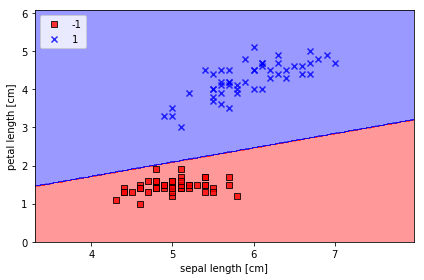

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

<br>
<br>

# Adaptive linear neurons and the convergence of learning

## Minimizing cost functions with gradient descent

In [7]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta: Learning rate (between 0.0 and 1.0)
    n_iter: Passes over the training dataset.

    Attributes
    -----------
    w_: Weights after fitting.
    cost_: Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data."""
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

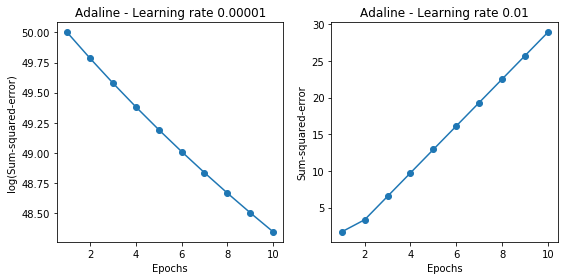

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.00001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), (ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.00001')

ada2 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.01')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

<br>
<br>

In [9]:
# normalization features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

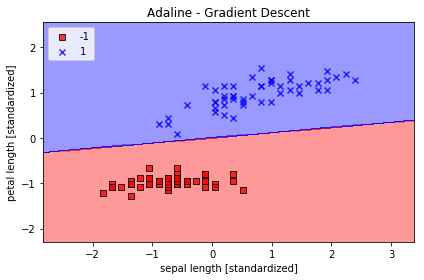

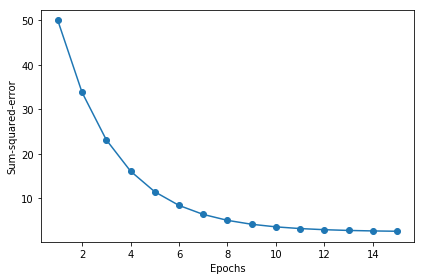

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

<br>
<br>